In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os



In [2]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=[IMAGE_WIDTH,IMAGE_HEIGHT]
IMAGE_CHANNELS=3

In [3]:
filenames=os.listdir(r"C:\Users\keerti chouhan\Desktop\train\train\train")
categories = []
for filename in filenames:
    category=filename.split(' . ')[0]
    if category == 'dog':
        catgories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [4]:
df.sample(5)

,filename,category
4800,cat.3068.jpg,0
22021,dog.7317.jpg,0
451,cat.10402.jpg,0
447,cat.104.jpg,0
17412,dog.3169.jpg,0


<AxesSubplot:>

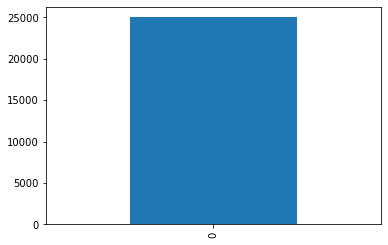

In [5]:
df['category'].value_counts().plot.bar()

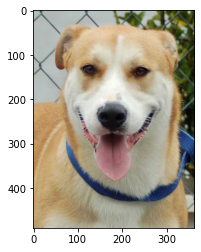

In [6]:
sample=random.choice(filenames)
image=load_img("C:/Users/keerti chouhan/Desktop/train/train/train/" +sample)
plt.imshow(image)

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dropout ,Flatten ,Dense,Activation,BatchNormalization
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,3)))
model.add(Dropout(0,25))

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,3)))
model.add(Dropout(0,25))

model.add(Conv2D(128,(3,3),activation='relu',input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,3)))
model.add(Dropout(0,25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0,5))
model.add(Dense(2,activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 42, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 42, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 40, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 40, 64)       2

In [10]:
df['category']=df['category'].replace({0:'cat',1:'dog'})

In [11]:
train_df,validate_df=train_test_split(df,test_size=0.20,random_state=42)
train_df=train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)

In [12]:
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [13]:
train_datagen=ImageDataGenerator(rotation_range=15,rescale=1./255,shear_range=0.1,zoom_range=0.2,horizontal_flip=True,
                                 width_shift_range=0.1,height_shift_range=0.1)
train_generator=train_datagen.flow_from_dataframe(train_df,"C:/Users/keerti chouhan/Desktop/train/train/train/",x_col='filename',y_col='category',target_size=IMAGE_SIZE,class_mode='categorical',batch_size=batch_size)

Found 20000 validated image filenames belonging to 1 classes.


In [14]:
validation_datagen=ImageDataGenerator(rescale=1./255)
validation_generator=validation_datagen.flow_from_dataframe(validate_df,"C:/Users/keerti chouhan/Desktop/train/train/train/",x_col='filename',y_col='category',target_size=IMAGE_SIZE,class_mode='categorical',batch_size=batch_size)

Found 5000 validated image filenames belonging to 1 classes.


Found 1 validated image filenames belonging to 1 classes.


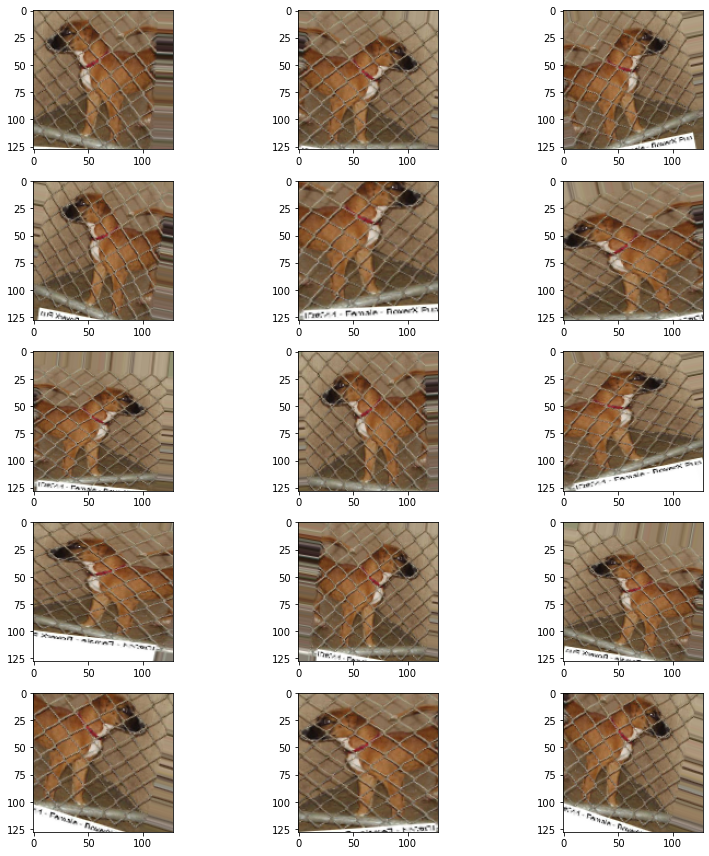

In [15]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "C:/Users/keerti chouhan/Desktop/train/train/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

#Plot the image in subplots
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()


In [16]:
epochs=3
history=model.fit(
train_generator,
epochs=epochs,
validation_data=validation_generator,
validation_steps=total_validate/batch_size,
steps_per_epoch=total_train//batch_size,
)

Epoch 1/3
1333/1333 [==============================] - 296s 221ms/step - loss: 1.4472 - accuracy: 0.4651 - val_loss: 1.3990 - val_accuracy: 0.7892
Epoch 2/3
1333/1333 [==============================] - 297s 223ms/step - loss: 1.3905 - accuracy: 0.4380 - val_loss: 1.3914 - val_accuracy: 0.5488
Epoch 3/3
1333/1333 [==============================] - 297s 222ms/step - loss: 1.3905 - accuracy: 0.4302 - val_loss: 1.3923 - val_accuracy: 0.4254


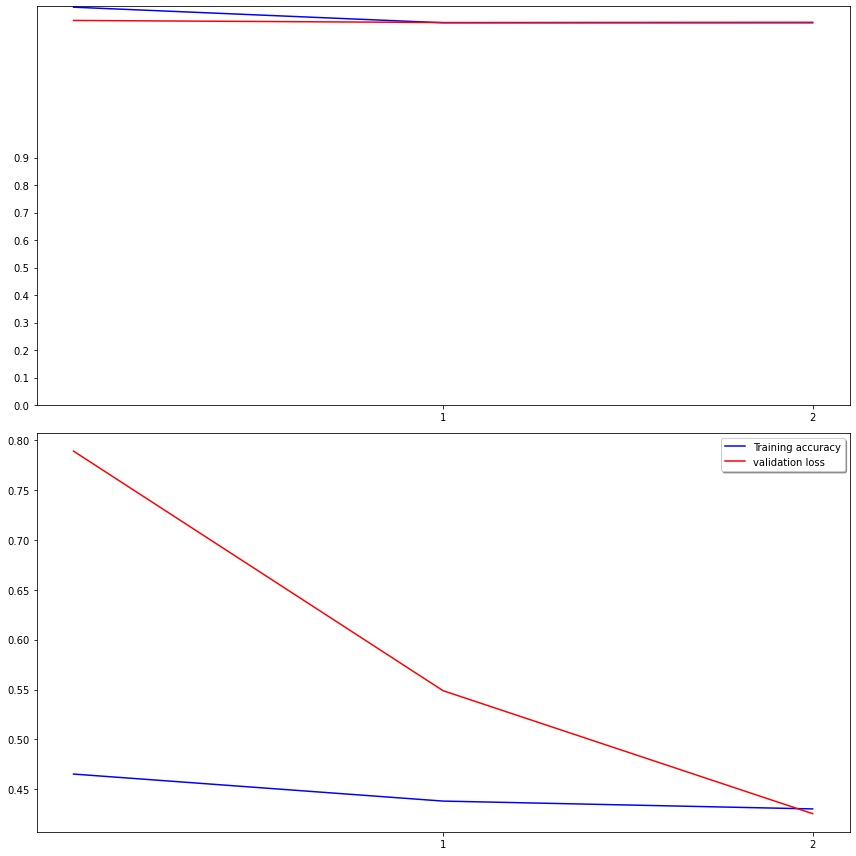

In [17]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,12))
ax1.plot(history.history['loss'],color='b',label="Training loss")
ax1.plot(history.history['val_loss'],color='r',label="validation loss")
ax1.set_xticks(np.arange(1,epochs,1))
ax1.set_yticks(np.arange(0,1,0.1))

ax2.plot(history .history['accuracy'],color='b',label="Training accuracy")
ax2.plot(history .history['val_accuracy'],color='r',label="validation loss")
ax2.set_xticks(np.arange(1,epochs,1))

legend=plt.legend(loc='best',shadow=True)
plt.tight_layout()

# for test data 

In [18]:
test_filenames=os.listdir(r"C:\Users\keerti chouhan\Desktop\test\test\test1")
test_df=pd.DataFrame({
    'filename': test_filenames
})

In [19]:
#Creating testing Generator

In [20]:
test_gen=ImageDataGenerator(rescale=1./255)
test_generator=test_gen.flow_from_dataframe(
  test_df,
  r"C:\Users\keerti chouhan\Desktop\test\test\test1",
x_col='filename',
y_col=None,
class_mode=None,
target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
    
)

Found 12500 validated image filenames.


# Prediction

In [21]:
predict=model.predict(test_generator)

834/834 [==============================] - 57s 68ms/step


In [22]:
test_df['category']=np.argmax(predict,axis=-1)

In [23]:
test_df.head()

,filename,category
0,1.jpg,0
1,10.jpg,1
2,100.jpg,1
3,1000.jpg,1
4,10000.jpg,0


In [24]:
test_df['category']=test_df['category'].replace({1:'dog',0: 'cat'})
test_df.head()

,filename,category
0,1.jpg,cat
1,10.jpg,dog
2,100.jpg,dog
3,1000.jpg,dog
4,10000.jpg,cat


<AxesSubplot:>

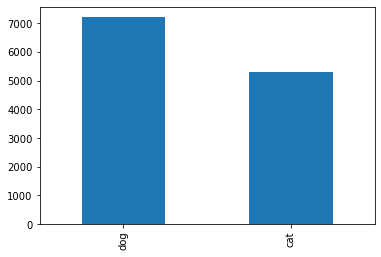

In [25]:
test_df['category'].value_counts().plot.bar()

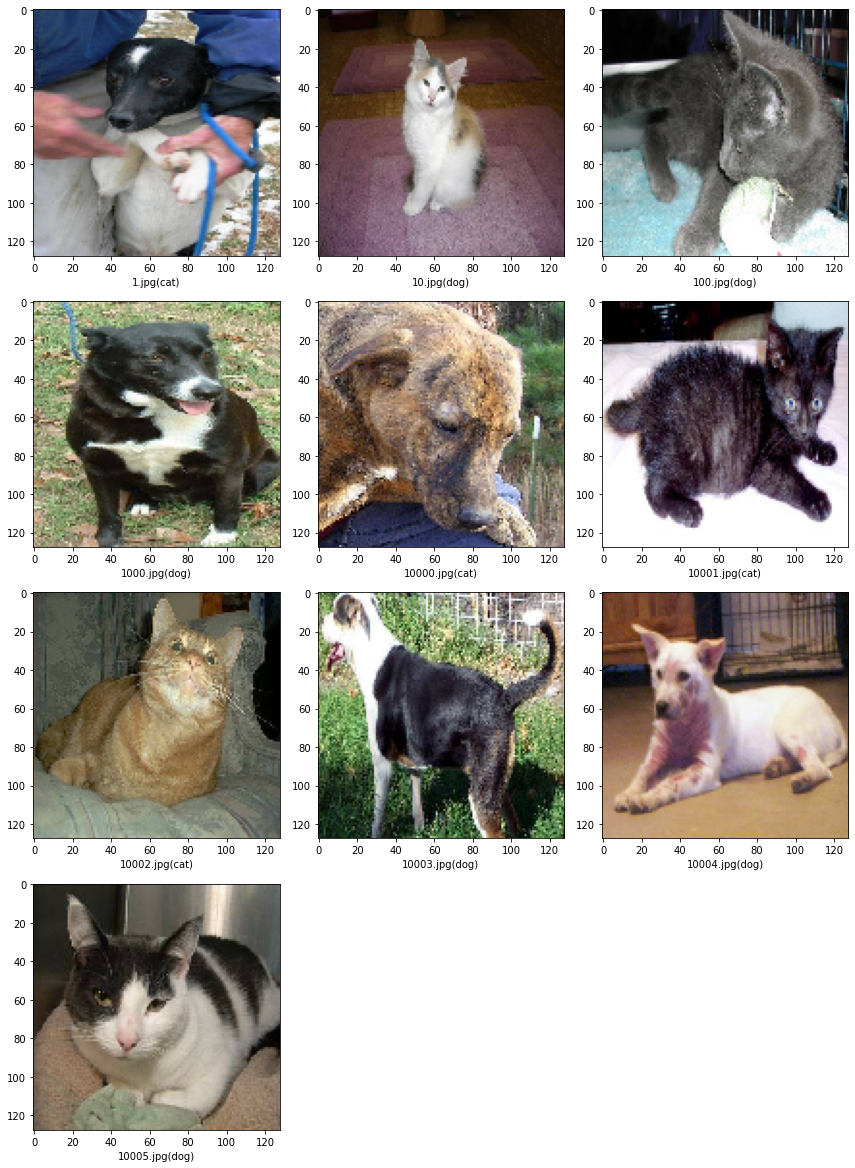

In [26]:
#Code to check sample is correctly predicted or not

sample_test = test_df.head(10)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("C:/Users/keerti chouhan/Desktop/test/test/test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [27]:
model.save('CATDOGModel')

INFO:tensorflow:Assets written to: CATDOGModel\assets


INFO:tensorflow:Assets written to: CATDOGModel\assets


NameError: name 'load_model' is not defined